In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cm1naivebayes/CM1.csv
/kaggle/input/kc1-csvsdmlp/kc1_csv.csv


In [31]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [32]:
df = pd.read_csv("../input/cm1naivebayes/CM1.csv")
df.head(2)

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,6.0,9.0,2.0,1.0,0.0,16.0,5.0,0.2,8.0,2.0,...,14.0,0.2,19.0,44.0,15.0,15.0,32.0,4.0,25.0,N
1,15.0,7.0,3.0,1.0,19.0,12.0,4.0,0.1,6.0,2.0,...,15.0,0.1,51.0,90.0,32.0,27.0,67.0,39.2,32.0,Y


In [33]:
df.shape

(344, 38)

In [34]:
df.loc[df.Defective == 'N',"Defective"] = 0
df.loc[df.Defective == 'Y',"Defective"] = 1

In [35]:
df.head

<bound method NDFrame.head of      LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0          6.0           9.0         2.0                   1.0           0.0   
1         15.0           7.0         3.0                   1.0          19.0   
2         27.0           9.0         1.0                   4.0          22.0   
3          7.0           3.0         2.0                   0.0           0.0   
4         51.0          25.0        13.0                   0.0          14.0   
..         ...           ...         ...                   ...           ...   
339       17.0          21.0         4.0                   1.0           8.0   
340       16.0          13.0         6.0                   0.0           5.0   
341       11.0           9.0         6.0                   0.0           4.0   
342        1.0           3.0         0.0                   0.0           0.0   
343       10.0          13.0         6.0                   1.0          16.0   

     COND

In [36]:
df = df[["LOC_TOTAL","LOC_CODE_AND_COMMENT","NUM_UNIQUE_OPERANDS","BRANCH_COUNT","NUM_OPERANDS","NUM_UNIQUE_OPERATORS","LOC_BLANK","Defective"]]

In [37]:
df.shape


(344, 8)

<AxesSubplot:xlabel='Defective', ylabel='count'>

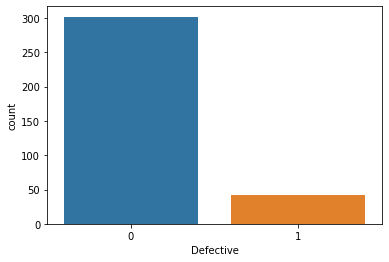

In [38]:
sns.countplot(df['Defective'],label="Count")

In [39]:
df['Defective'].value_counts()

0    302
1     42
Name: Defective, dtype: int64

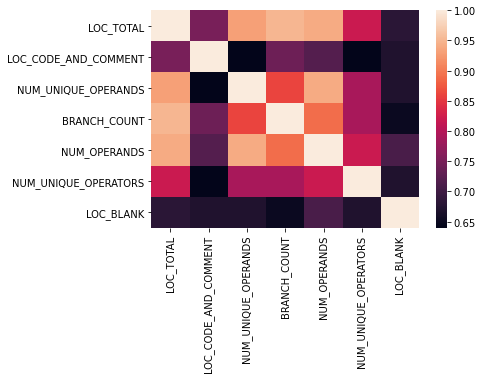

In [40]:
corr_matrix = df.corr().round(2)  # Round to 2 decimal places
sns.heatmap(data=corr_matrix)  # Set annot = True to print the values inside the squares
plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.4.1


In [42]:
y_train = df['Defective']
x_train = df.drop(labels =['Defective'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size = 0.3, random_state = 2)

In [43]:
x_train.shape

(240, 7)

In [44]:
# Define a simple sequential model
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(7,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2)
  ])

  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               4096      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 37,058
Trainable params: 37,058
Non-trainable params: 0
_________________________________________________________________


In [45]:

#Considering y variable holds numpy array
y_train = tf.convert_to_tensor(y_train, dtype=tf.int64) 

model.fit(x_train, y_train, epochs=100)

# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')

Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 5.3662 - sparse_categorical_accuracy: 0.6499
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 1.8586 - sparse_categorical_accuracy: 0.8518
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 3.7617 - sparse_categorical_accuracy: 0.7525
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 2.5547 - sparse_categorical_accuracy: 0.8420
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 2.9880 - sparse_categorical_accuracy: 0.8577
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 2.4408 - sparse_categorical_accuracy: 0.7383
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 3.0326 - sparse_categorical_accuracy: 0.8822
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 2.4516 - sparse_categorical_accuracy: 0.7295
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 1

In [46]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               4096      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 37,058
Trainable params: 37,058
Non-trainable params: 0
_________________________________________________________________


In [47]:
#Considering y variable holds numpy array
y_test = tf.convert_to_tensor(y_test, dtype=tf.int64)

In [48]:
# Evaluate the restored model
loss, acc = new_model.evaluate(x_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(x_test).shape)

4/4 - 0s - loss: 0.7986 - sparse_categorical_accuracy: 0.8365
Restored model, accuracy: 83.65%
(104, 2)


In [49]:
model.save('my_model.h5')

In [50]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               4096      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 37,058
Trainable params: 37,058
Non-trainable params: 0
_________________________________________________________________


In [51]:
loss, acc = new_model.evaluate(x_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

4/4 - 0s - loss: 0.7986 - sparse_categorical_accuracy: 0.8365
Restored model, accuracy: 83.65%


In [52]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

In [53]:
y_pred = new_model.predict_classes(x_test)

In [54]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

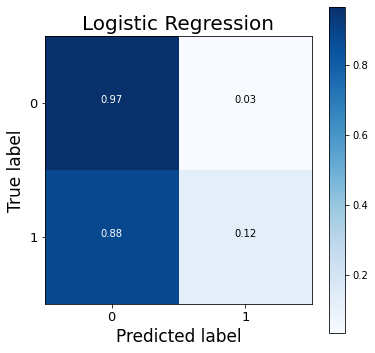

In [55]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=[0,1], title="Logistic Regression")
plt.show()

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        88
           1       0.40      0.12      0.19        16

    accuracy                           0.84       104
   macro avg       0.63      0.55      0.55       104
weighted avg       0.79      0.84      0.80       104



In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(104)]
lr_probs = y_pred
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.545


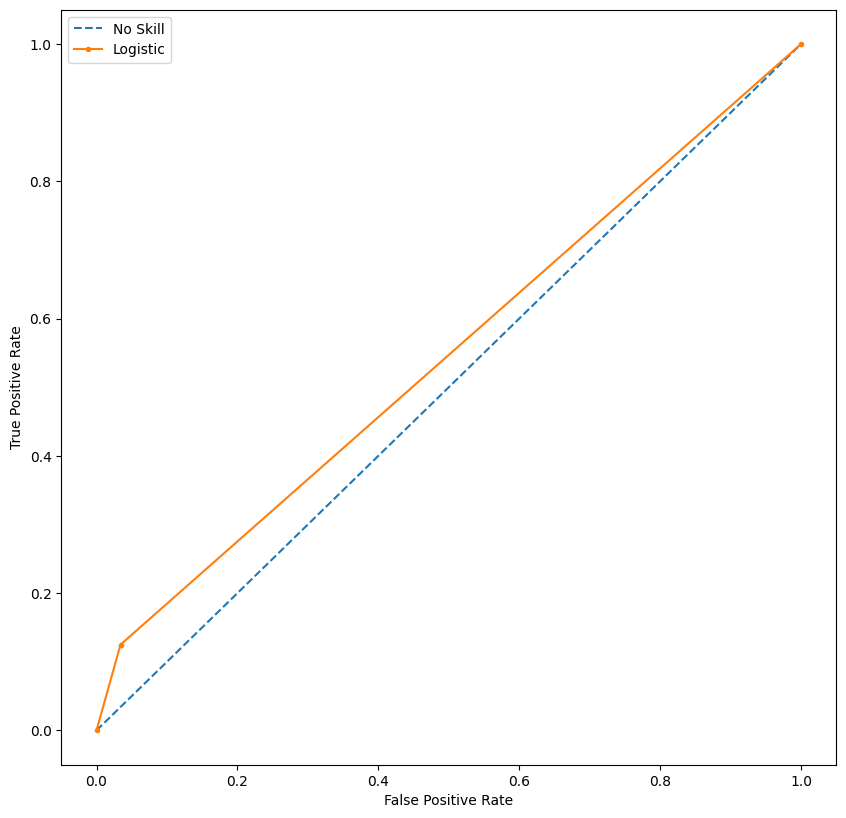

Logistic: f1=0.190 auc=0.330


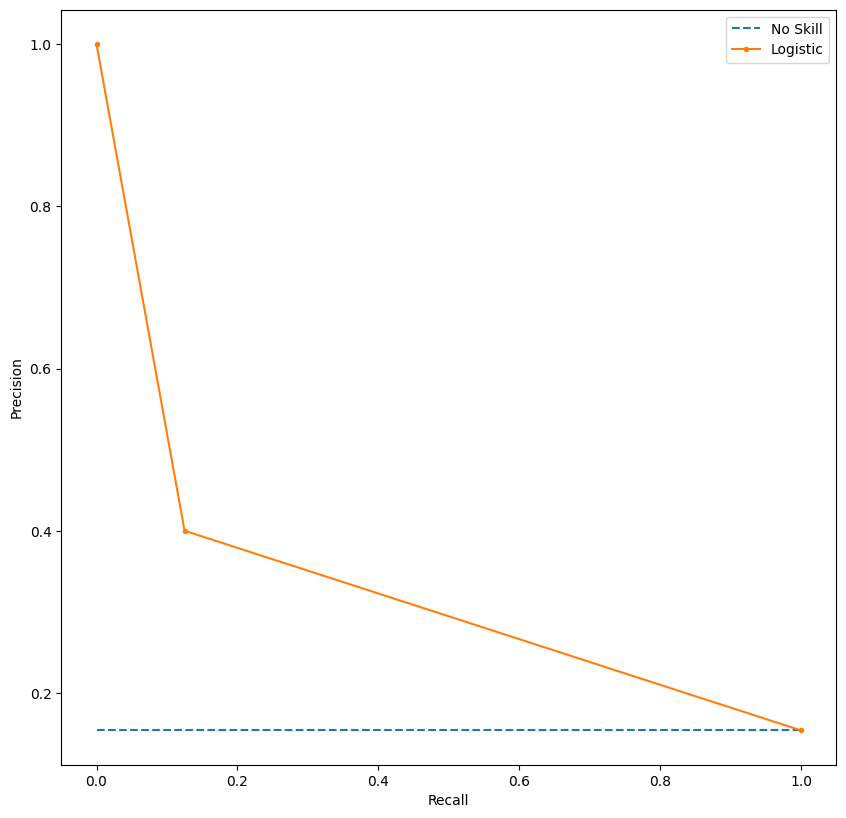

In [61]:
# calculate roc curves
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.figure(figsize=(10,10), dpi=100)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)

pyplot.figure(figsize=(10,10), dpi=100)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()